In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [49]:
#Loading dataset
df = pd.read_csv('winequality-red-2.csv')

In [50]:
#Let's check how the data is distributed
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = [0, 1]
df['quality_bin'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [52]:
# What is the total size of the dataset?
df.shape

(1599, 13)

In [53]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [54]:
df['quality_bin'].value_counts()

0    1382
1     217
Name: quality_bin, dtype: int64

In [55]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_bin           1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


In [56]:
# Deleting all columns except two 
columns_to_delete = ["fixed acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
                      "density", "pH", "sulphates", "alcohol", "quality"]
# axis=1 means that the operation is executed in the columns, axis=0 is in the rows
df_processed = df.drop(columns_to_delete, axis=1)
df_processed.head()

,volatile acidity,citric acid,quality_bin
0,0.70,0.00,0
1,0.88,0.00,0
2,0.76,0.04,0
3,0.28,0.56,0
4,0.70,0.00,0


<AxesSubplot:xlabel='quality_bin', ylabel='volatile acidity'>

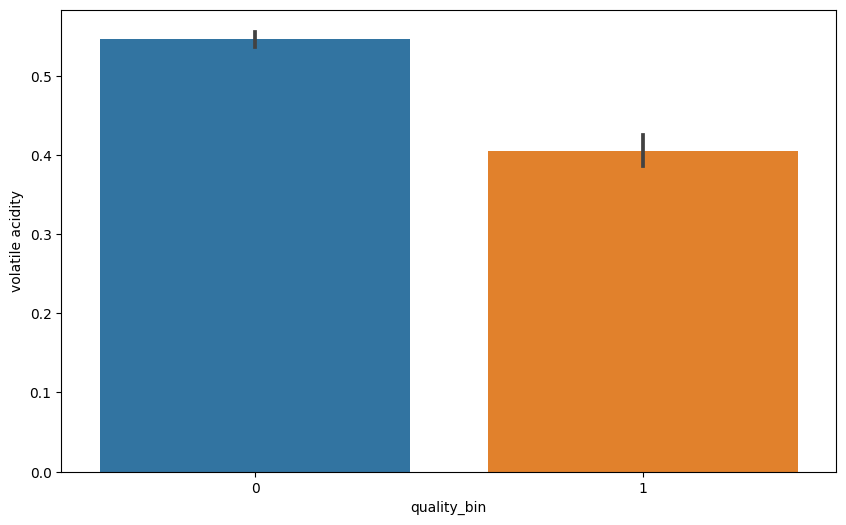

In [59]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality_bin', y = 'volatile acidity', data = df_processed)

<AxesSubplot:xlabel='quality_bin', ylabel='citric acid'>

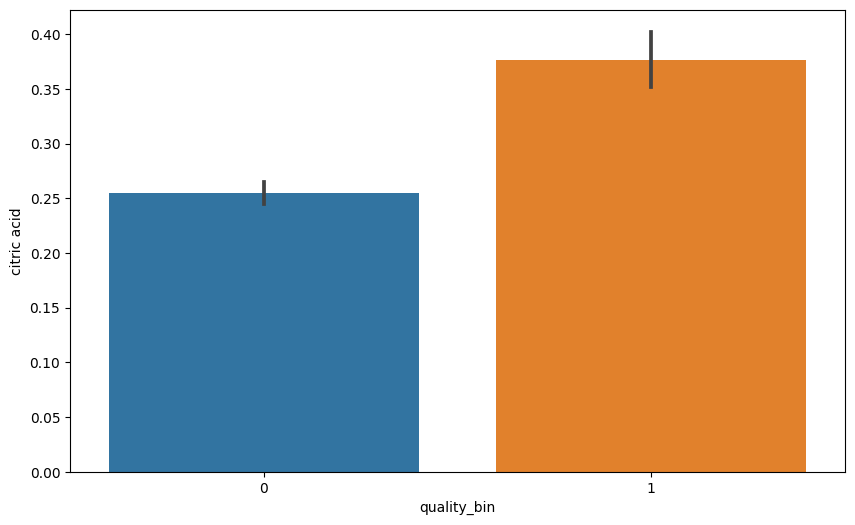

In [60]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality_bin', y = 'citric acid', data = df_processed)

In [61]:
# Count missing values per feature
df_processed.isnull().sum()

volatile acidity    0
citric acid         0
quality_bin         0
dtype: int64

In [28]:
# X, y split
X = df_processed[df_processed.columns[:-1]]

y_true = df_processed[df_processed.columns[-1]]

In [37]:
X.iloc[:, 0]

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64

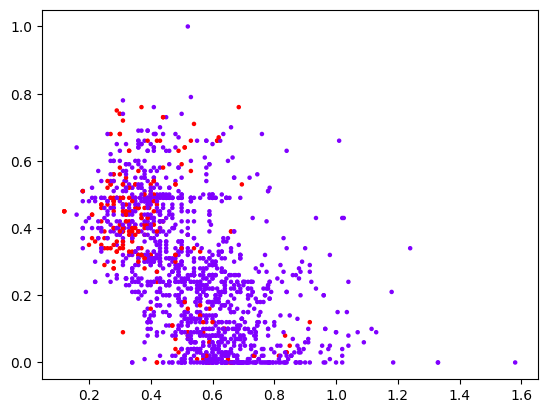

In [62]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=5, c=y_true ,cmap='rainbow')

In [63]:
# Check the data ranges
print("\nNormalized data ranges:")
print("X_scaled - Minimum:", X.min(axis=0))
print("X_scaled - Maximum:", X.max(axis=0))


Normalized data ranges:
X_scaled - Minimum: volatile acidity    0.12
citric acid         0.00
dtype: float64
X_scaled - Maximum: volatile acidity    1.58
citric acid         1.00
dtype: float64


In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [65]:
# Check the normalized data ranges
print("\nNormalized data ranges:")
print("X_scaled - Minimum:", X_scaled.min(axis=0))
print("X_scaled - Maximum:", X_scaled.max(axis=0))


Normalized data ranges:
X_scaled - Minimum: [-2.27827974 -1.39147228]
X_scaled - Maximum: [5.87797605 3.74357393]


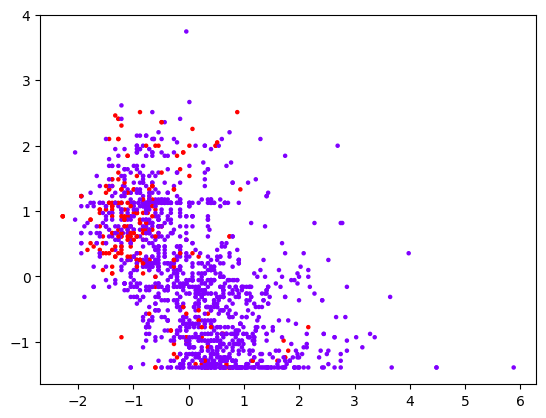

In [66]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=5, c=y_true ,cmap='rainbow')

In [67]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=29)

In [76]:
# Let's build a function to see the decision boundary of a classifier
# (There is no need to understand the implementation details of this function!)
def visualize_and_compare_decision_boundaries(X, real_y, classifier, title="", step=0.005):
    """
    Function based on the example from 
    https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        classifier: (sklearn-object) - Object that classifies the data
    Returns:
        A plot with two axes showing the decision boundaries
    """

    # Plotting decision regions
    x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max() * 1.1
    y_min, y_max = X.iloc[:, 1].min(), X.iloc[:, 1].max() * 1.1

    # We are creating a 2D grid of test data to be able to show the decision boundaries
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    # And we apply the classifier to each sample in the 2D grid to see what would the prediction
    # be at each specific point of the space
    Z = classifier.predict(np.column_stack([xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plot contains real class labels and 
    # the decision boundary created by the classifier
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(x = X.iloc[:,0], y = X.iloc[:,1], c=real_y, s=30, edgecolor="k", label="True class labels")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.grid(True); plt.legend()

    if title == "":
        plt.suptitle("True class labels and predicted decision boundary")
    else:
        plt.suptitle(title)

    return plt.show()

In [71]:
# Let's create a function to visualize the true labels and predicted labels easier
def visualize_and_compare_classifications(X, real_y, predicted_y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        predicted_y: (np.array[N,1]) - Predicted class labels from X
    Returns:
        A plot with two axes showing the real and the predicted labels
    """

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    
    # First plot contains real class labels
    ax = axes[0]
    ax.scatter(x = X[:,0], y = X[:,1], c=real_y, s=30)
    ax.set(xlabel="feature 1",ylabel="feature 2",title="Real labels")
    ax.grid(True)

    # Second plot contains predicted class labels
    ax = axes[1]
    ax.scatter(x = X[:,0], y = X[:,1], c=predicted_y, s=30)
    ax.set(xlabel="feature 1",ylabel="feature 2",title="Predicted labels")
    ax.grid(True)

    if title != "":
        plt.suptitle(title)

    return plt.show()


According to the DT classifier, the class labels in the test set are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


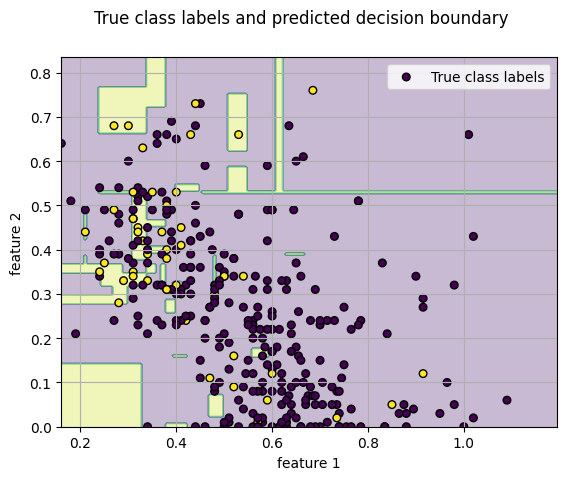

In [77]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth = 10)     # Criterion split by default is gini-index, which is ok
dt_classifier.fit(X_train, y_train)
y_predicted_dt = dt_classifier.predict(X_test)

print("According to the DT classifier, the class labels in the test set are: ", y_predicted_dt)

visualize_and_compare_decision_boundaries(X_test, y_test, dt_classifier)

According to the RF classifier, the class labels in the test set are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


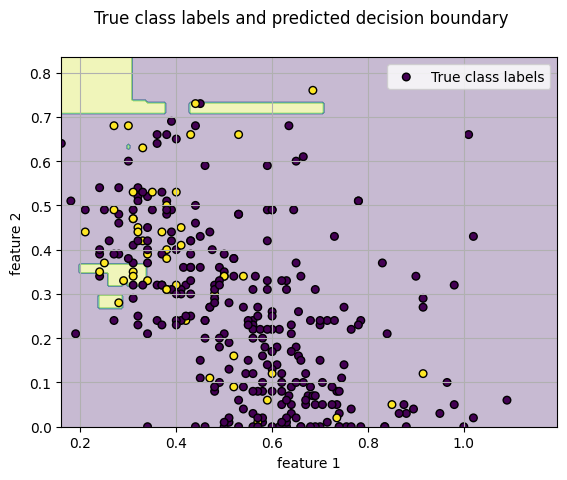

In [83]:

rf_classifier = RandomForestClassifier(n_estimators=6, max_depth=5, criterion="entropy")
rf_classifier.fit(X_train, y_train)
y_predictedrf = rf_classifier.predict(X_test)

print("According to the RF classifier, the class labels in the test set are: ", y_predictedrf)

# Let's visualize the classification boundary of the Random Forest
visualize_and_compare_decision_boundaries(X_test, y_test, rf_classifier)

According to the KNN, the class labels in the test set are:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


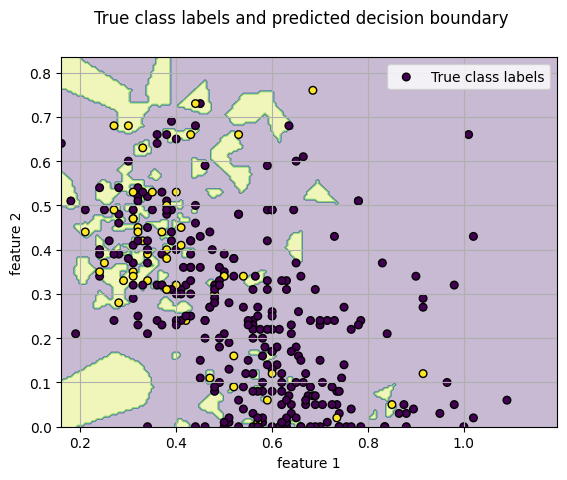

In [85]:

knn_classifier = KNeighborsClassifier(n_neighbors=1)    # The default distance metric is Euclidean, which is usually ok.
knn_classifier.fit(X_train, y_train)
y_predictedknn = knn_classifier.predict(X_test)

print("According to the KNN, the class labels in the test set are: ", y_predictedknn)

visualize_and_compare_decision_boundaries(X_test, y_test, knn_classifier)